# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 611


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=imperial"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city.replace(' ', '+')}"
    
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp_F = city_weather["main"]["temp_max"]
        city_max_temp_C = round((city_max_temp_F - 32) * 5/9,2)
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp_C,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

       

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ust-nera
Processing Record 2 of Set 1 | krasnovishersk
Processing Record 3 of Set 1 | college
Processing Record 4 of Set 1 | bredasdorp
Processing Record 5 of Set 1 | jamestown
Processing Record 6 of Set 1 | naze
Processing Record 7 of Set 1 | vilhena
Processing Record 8 of Set 1 | pangody
Processing Record 9 of Set 1 | goderich
Processing Record 10 of Set 1 | blackmans bay
Processing Record 11 of Set 1 | port-aux-francais
Processing Record 12 of Set 1 | taiohae
City not found. Skipping...
Processing Record 13 of Set 1 | burang
Processing Record 14 of Set 1 | mount gambier
Processing Record 15 of Set 1 | kodiak
Processing Record 16 of Set 1 | ancud
Processing Record 17 of Set 1 | isafjordur
Processing Record 18 of Set 1 | albany
Processing Record 19 of Set 1 | iqaluit
Processing Record 20 of Set 1 | puerto armuelles
Processing Record 21 of Set 1 | edinburgh of the seven seas
Processing Record 22 

Processing Record 40 of Set 4 | lauro de freitas
Processing Record 41 of Set 4 | goba
Processing Record 42 of Set 4 | nouadhibou
Processing Record 43 of Set 4 | takoradi
Processing Record 44 of Set 4 | bubaque
Processing Record 45 of Set 4 | tranovaho
City not found. Skipping...
Processing Record 46 of Set 4 | kailua-kona
Processing Record 47 of Set 4 | rifle
Processing Record 48 of Set 4 | sal rei
Processing Record 49 of Set 4 | polyarnyy
Processing Record 0 of Set 5 | talnakh
Processing Record 1 of Set 5 | pontian kechil
Processing Record 2 of Set 5 | pailon
Processing Record 3 of Set 5 | broken hill
Processing Record 4 of Set 5 | ouellah
City not found. Skipping...
Processing Record 5 of Set 5 | yagry
City not found. Skipping...
Processing Record 6 of Set 5 | taroa
Processing Record 7 of Set 5 | tiksi
Processing Record 8 of Set 5 | camamu
Processing Record 9 of Set 5 | dryden
Processing Record 10 of Set 5 | siwa oasis
Processing Record 11 of Set 5 | sterling
Processing Record 12 of 

Processing Record 33 of Set 8 | veseli nad luznici
Processing Record 34 of Set 8 | landen
Processing Record 35 of Set 8 | guichon
Processing Record 36 of Set 8 | rozdilna
Processing Record 37 of Set 8 | kiama
Processing Record 38 of Set 8 | wulingyuan
Processing Record 39 of Set 8 | devonport
Processing Record 40 of Set 8 | belyy yar
Processing Record 41 of Set 8 | mount pearl
Processing Record 42 of Set 8 | lamar
Processing Record 43 of Set 8 | kudymkar
Processing Record 44 of Set 8 | la passe
Processing Record 45 of Set 8 | camalu
Processing Record 46 of Set 8 | bairnsdale
Processing Record 47 of Set 8 | sao caetano de odivelas
Processing Record 48 of Set 8 | stokesdale
Processing Record 49 of Set 8 | norilsk
Processing Record 0 of Set 9 | flagstaff
Processing Record 1 of Set 9 | kerikeri
Processing Record 2 of Set 9 | benito juarez
Processing Record 3 of Set 9 | pauls valley
Processing Record 4 of Set 9 | magadan
Processing Record 5 of Set 9 | cova figueira
Processing Record 6 of Se

Processing Record 21 of Set 12 | boda
Processing Record 22 of Set 12 | lorengau
Processing Record 23 of Set 12 | selfoss
Processing Record 24 of Set 12 | kalevala
Processing Record 25 of Set 12 | naxos
Processing Record 26 of Set 12 | byalynichy
Processing Record 27 of Set 12 | mahalapye
Processing Record 28 of Set 12 | mildura
Processing Record 29 of Set 12 | yelizovo
Processing Record 30 of Set 12 | gaoping
Processing Record 31 of Set 12 | port pirie
Processing Record 32 of Set 12 | tsiolkovskiy
City not found. Skipping...
Processing Record 33 of Set 12 | katsuren-haebaru
Processing Record 34 of Set 12 | laguna
Processing Record 35 of Set 12 | shimoda
Processing Record 36 of Set 12 | outjo
Processing Record 37 of Set 12 | mamfe
Processing Record 38 of Set 12 | emerald
Processing Record 39 of Set 12 | bardai
Processing Record 40 of Set 12 | rongelap
Processing Record 41 of Set 12 | alotau
City not found. Skipping...
Processing Record 42 of Set 12 | susaki
Processing Record 43 of Set 1

In [4]:
city_weather

{'cod': '404', 'message': 'city not found'}

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          583
Lat           583
Lng           583
Max Temp      583
Humidity      583
Cloudiness    583
Wind Speed    583
Country       583
Date          583
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ust-nera,64.5667,143.2000,0.97,87,84,5.88,RU,1695073824
1,krasnovishersk,60.4078,57.0820,9.33,90,93,10.02,RU,1695073824
2,college,64.8569,-147.8028,6.97,86,100,3.44,US,1695073824
3,bredasdorp,-34.5322,20.0403,9.58,92,58,4.29,ZA,1695073824
4,jamestown,42.0970,-79.2353,18.03,66,75,10.36,US,1695073824


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ust-nera,64.5667,143.2000,0.97,87,84,5.88,RU,1695073824
1,krasnovishersk,60.4078,57.0820,9.33,90,93,10.02,RU,1695073824
2,college,64.8569,-147.8028,6.97,86,100,3.44,US,1695073824
3,bredasdorp,-34.5322,20.0403,9.58,92,58,4.29,ZA,1695073824
4,jamestown,42.0970,-79.2353,18.03,66,75,10.36,US,1695073824


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

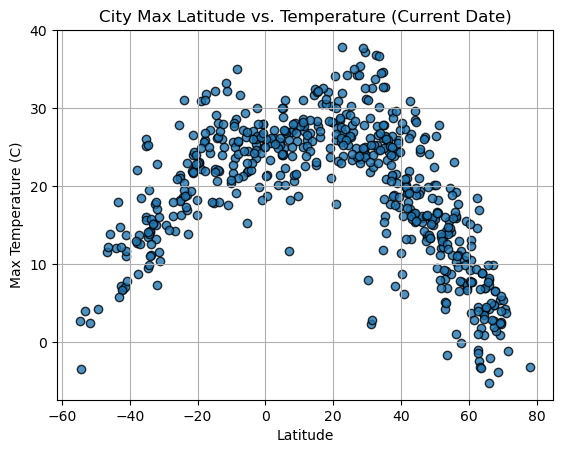

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", marker="o",alpha =0.8)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (Current Date)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

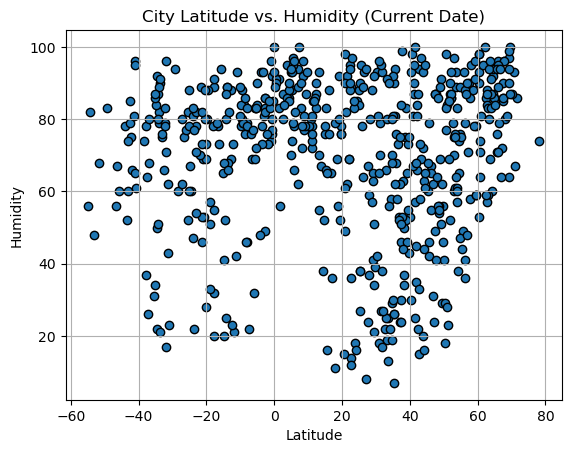

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (Current Date)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

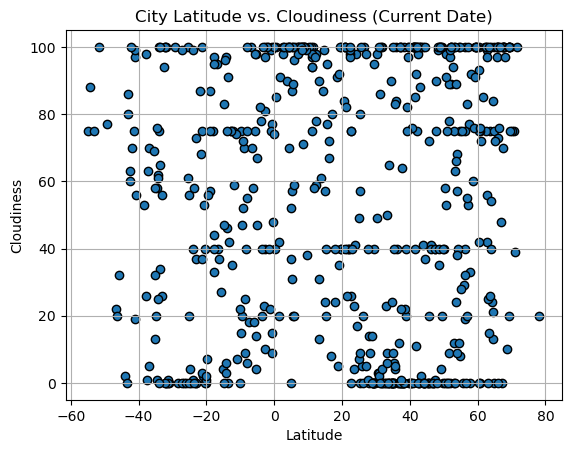

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (Current Date)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

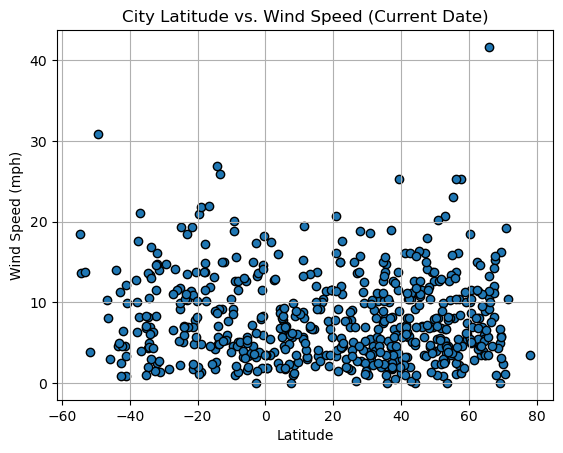

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (Current Date)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, Yname, text_coordinates):
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    
    plt.scatter(x_values, y_values, marker="o")
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    
    plt.xlabel("Latitude")
    plt.ylabel(Yname)
    print(f"The r-Value is: {r_value}")

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ust-nera,64.5667,143.2000,0.97,87,84,5.88,RU,1695073824
1,krasnovishersk,60.4078,57.0820,9.33,90,93,10.02,RU,1695073824
2,college,64.8569,-147.8028,6.97,86,100,3.44,US,1695073824
4,jamestown,42.0970,-79.2353,18.03,66,75,10.36,US,1695073824
5,naze,28.3667,129.4833,23.51,80,9,2.73,JP,1695073824


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,bredasdorp,-34.5322,20.0403,9.58,92,58,4.29,ZA,1695073824
6,vilhena,-12.7406,-60.1458,26.12,69,75,9.22,BR,1695073689
9,blackmans bay,-43.0167,147.3167,14.85,60,80,11.23,AU,1695073825
10,port-aux-francais,-49.3500,70.2167,4.31,83,77,30.78,TF,1695073825
12,mount gambier,-37.8333,140.7667,12.69,78,26,10.00,AU,1695073825


###  Temperature vs. Latitude Linear Regression Plot

The r-Value is: -0.755516097736105


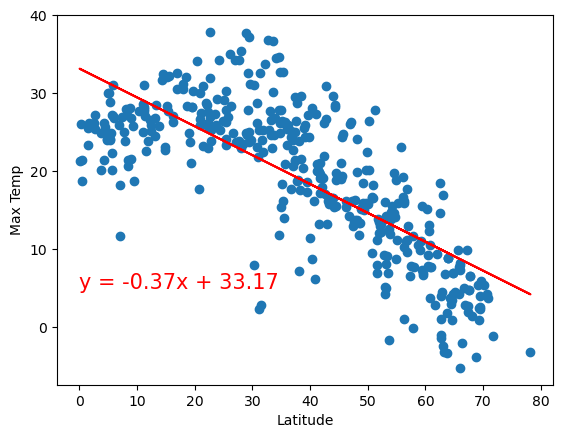

In [16]:
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Max Temp" ,(0, 5))

The r-Value is: 0.7804978184044643


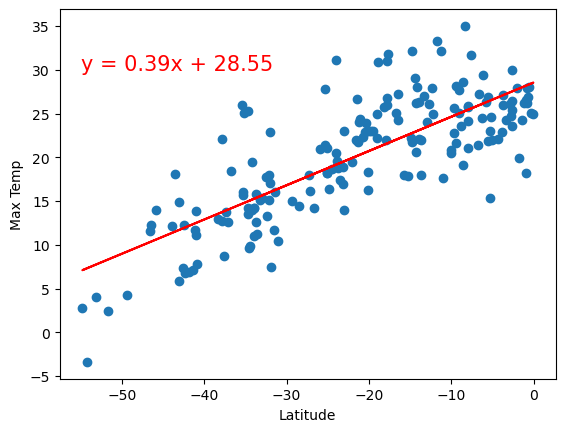

In [17]:
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Max Temp", (-55, 30))

The linear regression for the Northern hemisphere is negative, and shows as latitude increases the temperature reduces. On the other hand the southern hemisphere shows a positive linear regression, as the temperature increases as the latitude increases. 

### Humidity vs. Latitude Linear Regression Plot

The r-Value is: 0.03657949241682159


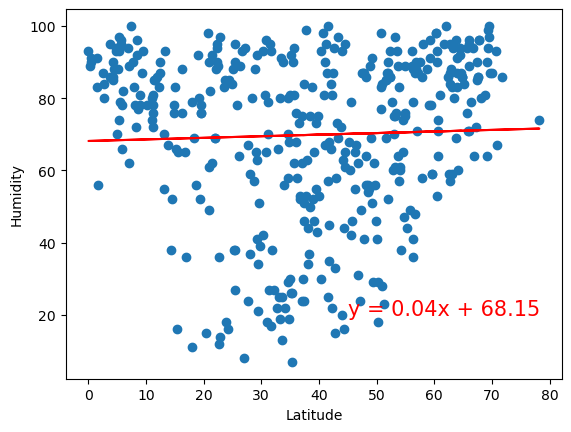

In [18]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Humidity", (45, 20))

The r-Value is: 0.14183987673158963


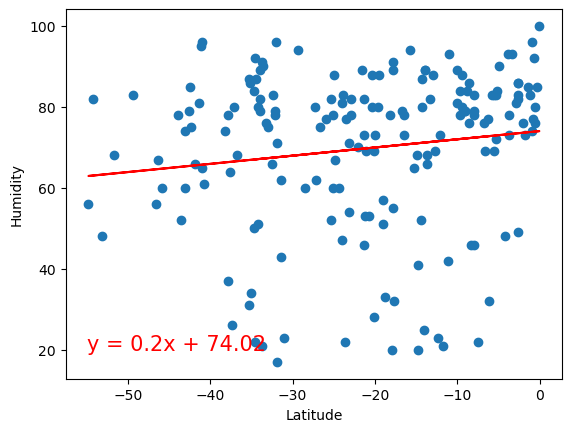

In [19]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Humidity", (-55, 20))

Overall, the Northen Hemisphere linear regression line shows a posisitve correlation, whereas the Southern Hemisphere linear regression line shows a negative correlation. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-Value is: -0.03749011531333836


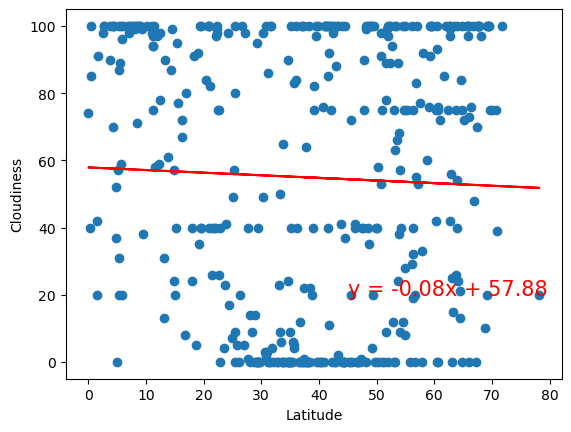

In [20]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Cloudiness", (45, 20))

The r-Value is: 0.025334270870597808


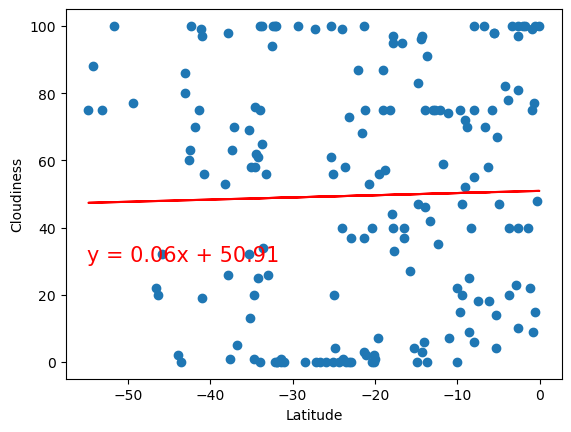

In [21]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Cloudiness", (-55, 30))

Both these regression lines represent positive linear relationships between latitude and cloudiness in the Northen and southern Hemisphere. The southern regression line is slightly stronger. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-Value is: 0.10627567233597945


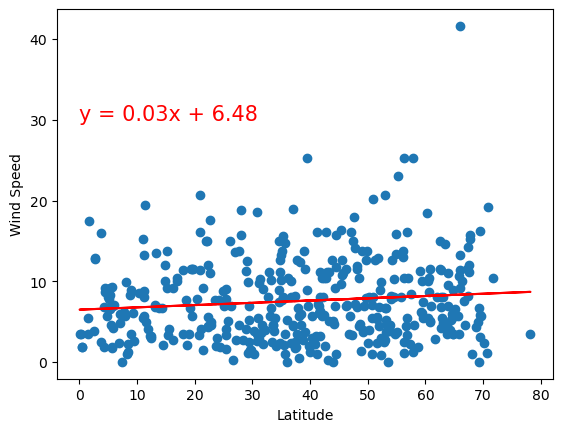

In [22]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Wind Speed", (0, 30))

The r-Value is: -0.2620718106799714


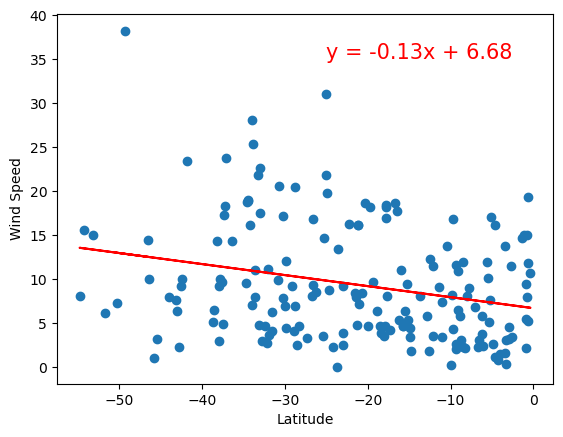

In [24]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Wind Speed", (-25, 35))

The Northen Hemisphere regression line represents a very shallow positive linear relationship, whereas the southern hemisphere regression line represents a steeper negative linear relationship. 